In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/Adidas-US-Sales-Analysis/main/Adidas%20US%20Sales%20Dataset.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [48]:
df = df[df['Units Sold'] != 0]

In [49]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9644 non-null   object        
 1   Retailer ID       9644 non-null   int64         
 2   Invoice Date      9644 non-null   datetime64[ns]
 3   Region            9644 non-null   object        
 4   State             9644 non-null   object        
 5   City              9644 non-null   object        
 6   Product           9644 non-null   object        
 7   Price per Unit    9644 non-null   float64       
 8   Units Sold        9644 non-null   int64         
 9   Total Sales       9644 non-null   float64       
 10  Operating Profit  9644 non-null   float64       
 11  Operating Margin  9644 non-null   float64       
 12  Sales Method      9644 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.0+ MB


The dataset has been cleaned of errors and is now ready for analysis.

<br>

## Retailer Analysis

In [51]:
df['Retailer'].groupby(df['Retailer']).count()

Retailer
Amazon            949
Foot Locker      2633
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
Name: Retailer, dtype: int64

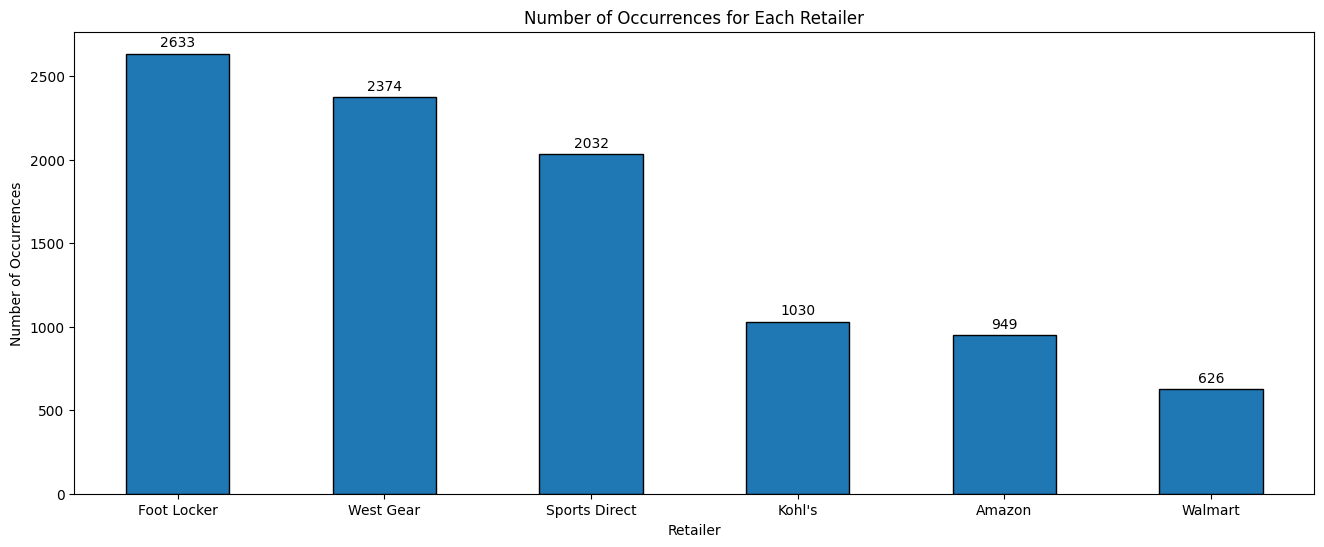

In [52]:
plt.figure(figsize=(16, 8))
bars = df['Retailer'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Number of Occurrences for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=360)
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')
plt.show()

The chart includes six retailers: Foot Locker, West Gear, Sports Direct, Kohl's, Amazon, and Walmart. **Foot Locker** has the highest number of occurrences at 2,637, followed by West Gear with 2,374 occurrences, and Sports Direct with 2,032 occurrences. Kohl's shows 1,030 occurrences, Amazon has 949 occurrences, and Walmart has the lowest number of occurrences at 626. From this chart, we can conclude that Foot Locker is the retailer with the most frequent representation of Adidas products in the dataset, suggesting it may have a significant partnership or emphasis on Adidas merchandise. On the other hand, Walmart has the fewest occurrences, indicating it is the least represented retailer for Adidas products in the dataset. The three most represented retailers (Foot Locker, West Gear, Sports Direct) dominate the dataset, each having more than 2,000 occurrences, while the others are below 1,100 occurrences.

<br>

### Average Price per Unit for Each Retailer

In [53]:
df.groupby('Retailer')['Price per Unit'].agg(['mean', 'min', 'median', 'std', 'max']).round(2)

,mean,min,median,std,max
Retailer,,,,,
Amazon,48.76,19.0,50.0,11.83,80.0
Foot Locker,44.81,9.0,45.0,13.53,105.0
Kohl's,44.61,9.0,45.0,11.81,75.0
Sports Direct,42.05,7.0,41.0,12.86,95.0
Walmart,47.18,8.0,45.0,18.22,110.0
West Gear,46.74,7.0,46.0,17.69,110.0


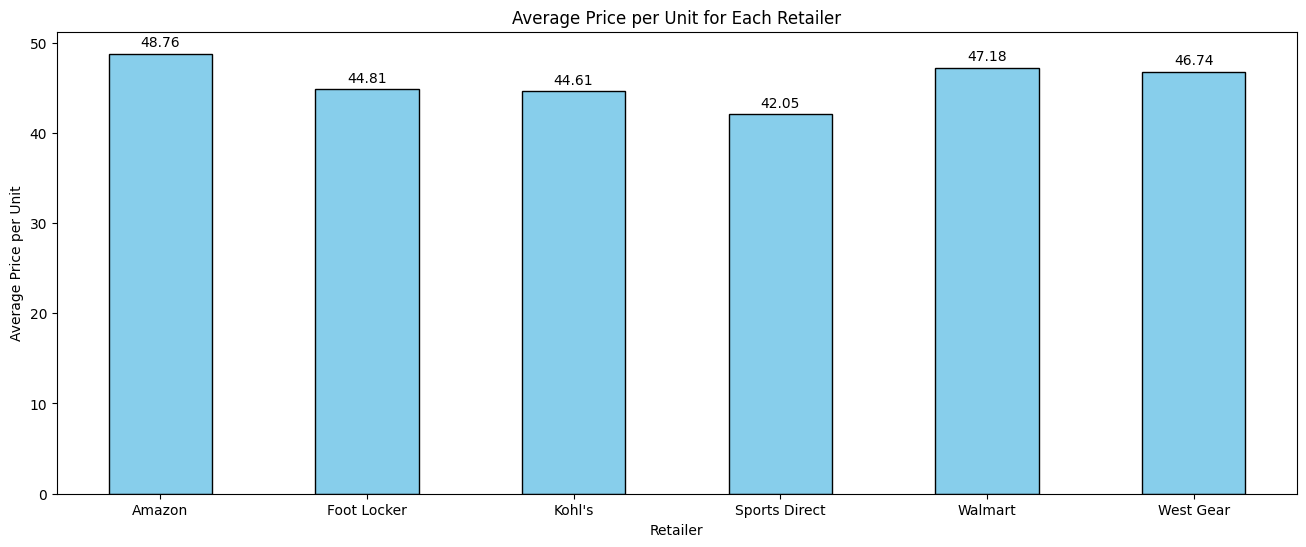

In [54]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Price per Unit'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Price per Unit for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The highest average unit price is observed at Amazon, where it stands at $48.76. Following this, Foot Locker offers Adidas products at an average unit price of $44.81, and Kohl's has a similar average price of $44.61. Sports Direct stands out with the lowest average unit price, which is $42.05. Walmart, on the other hand, has an average unit price of $47.18, making it one of the more expensive retailers, similar to West Gear, where the average price is $46.74. The chart suggests that Amazon and Walmart have the highest average prices, potentially indicating a focus on higher-end products or higher margins. In contrast, Sports Direct offers the most affordable prices, possibly targeting budget-conscious consumers. Foot Locker and Kohl's have very similar average prices, which might indicate that they are competing for a similar market segment. Overall, the chart reveals diverse pricing strategies among the retailers, ranging from premium pricing to more affordable options.

<br>

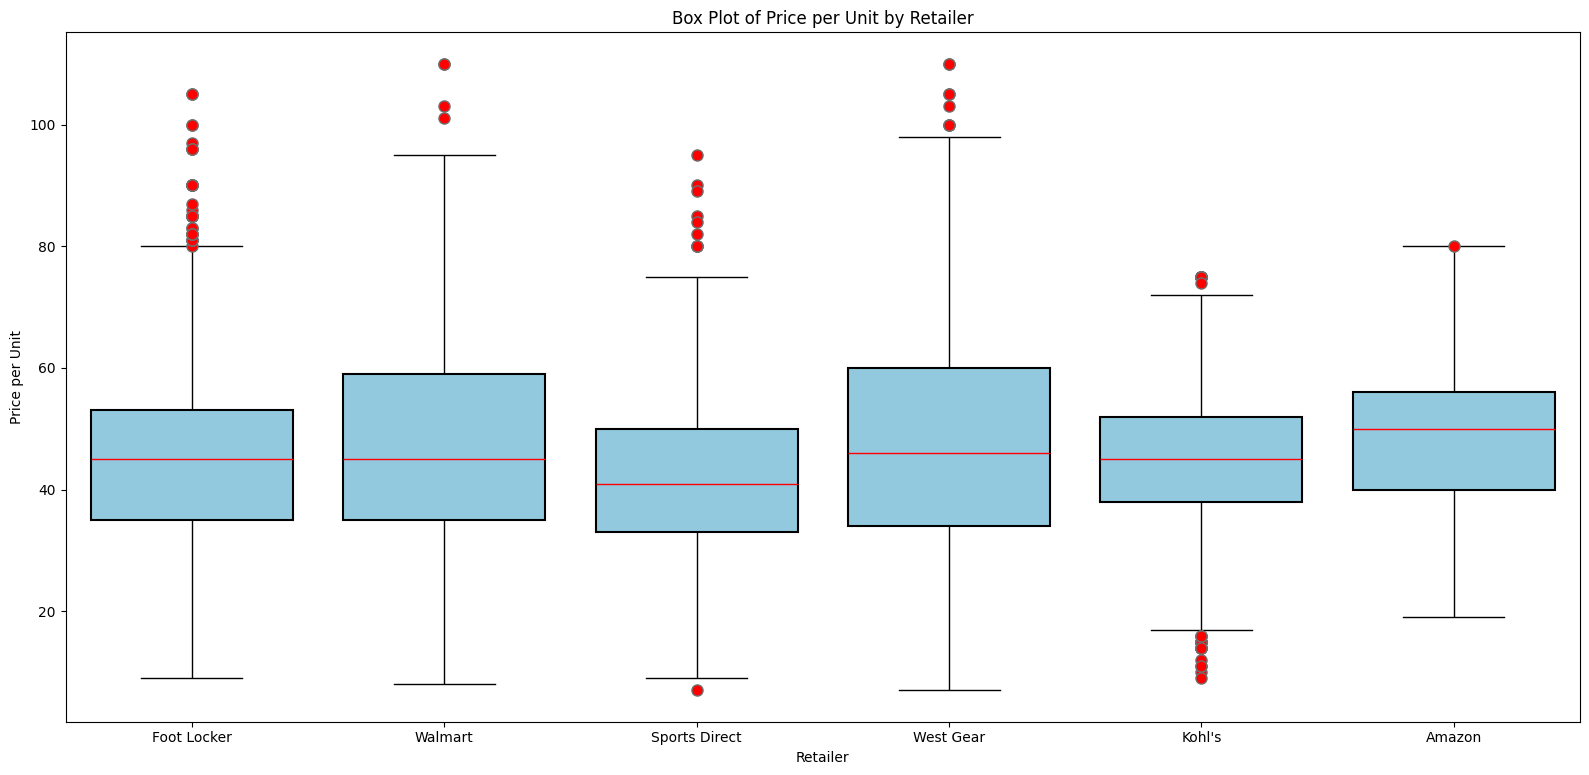

In [80]:
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Retailer', y='Price per Unit', data=df, hue='Retailer',
            palette={'Walmart': "skyblue", "Kohl's": "skyblue", "West Gear": "skyblue", "West Gear": "skyblue", 'Amazon': "skyblue", 'Foot Locker': "skyblue", 'Sports Direct': "skyblue"},
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

for patch in boxplot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    
plt.title('Box Plot of Price per Unit by Retailer')
plt.suptitle('')
plt.xlabel('Retailer')
plt.ylabel('Price per Unit')
plt.tight_layout()
plt.show()

<br>

### Units Sold by Each Retailer

In [55]:
df.groupby('Retailer')['Units Sold'].agg(['sum', 'mean', 'min', 'median', 'std', 'max']).round(2)

,sum,mean,min,median,std,max
Retailer,,,,,,
Amazon,197990,208.63,13,149.0,169.65,900
Foot Locker,604369,229.54,6,150.0,216.46,1275
Kohl's,287375,279.00,22,197.0,204.68,950
Sports Direct,557640,274.43,22,189.0,219.36,1075
Walmart,206225,329.43,58,241.5,252.67,1200
West Gear,625262,263.38,7,184.0,207.86,1150
